## Import Libraries

In [2]:
## Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import numpy as np    # For array operations
import pandas as pd   # For DataFrames
import matplotlib.pyplot as plt    # For plotting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier



## Load data

In [3]:
## Read "UniversalBank.csv" using pandas
universal = pd.read_csv("UniversalBank.csv")

In [6]:
## Print the first 7 rows
universal.head(7)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0


In [7]:
## Check the datatype of each variable
universal.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

## Pre-Processing

In [8]:
## Drop columns which are not significant (Eg: ID,etc..)
universal = universal.drop(["ID"],axis=1)
universal = universal.drop(["ZIP Code"],axis=1)


In [9]:
universal.head(6)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0


In [10]:
## Convert Categorical Columns to Dummies using pandas
## Use columns and drop_first argument
#universal['Education'] = universal['Education'].astype('category')
#universal['Personal Loan'] = universal['Personal Loan'].astype('category')
#universal['Securities Account'] = universal['Securities Account'].astype('category')
#universal['CD Account'] = universal['CD Account'].astype('category')
#universal['Online'] = universal['Online'].astype('category')
#universal['CreditCard'] = universal['CreditCard'].astype('category')
universal = pd.get_dummies(universal,columns=["Family","Education","Personal Loan","Securities Account","CD Account","Online","CreditCard"],drop_first=True)


#universal[['Education'],['Personal Loan'],['Securities Account'],['CD Account'],['Online'],['CreditCard']] = universal[['Education'],['Personal Loan'],['Securities Account'],['CD Account'],['Online'],['CreditCard']].astype('category')

In [11]:
## Split the data into X and y
universal.info()
universal_x = universal.drop('Personal Loan_1',axis=1)
universal_y = universal['Personal Loan_1']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
Age                     5000 non-null int64
Experience              5000 non-null int64
Income                  5000 non-null int64
CCAvg                   5000 non-null float64
Mortgage                5000 non-null int64
Family_2                5000 non-null uint8
Family_3                5000 non-null uint8
Family_4                5000 non-null uint8
Education_2             5000 non-null uint8
Education_3             5000 non-null uint8
Personal Loan_1         5000 non-null uint8
Securities Account_1    5000 non-null uint8
CD Account_1            5000 non-null uint8
Online_1                5000 non-null uint8
CreditCard_1            5000 non-null uint8
dtypes: float64(1), int64(4), uint8(10)
memory usage: 244.2 KB


In [12]:
## Split X and y into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
x_train,x_test,y_train,y_test = train_test_split(universal_x,universal_y,test_size=0.2,random_state=0)

In [13]:
## Print the shape of X_train, X_test, y_train, y_test
x_train.shape
y_train.shape

x_test.shape
y_test.shape



(1000,)

In [14]:
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 2913 to 2732
Data columns (total 14 columns):
Age                     4000 non-null int64
Experience              4000 non-null int64
Income                  4000 non-null int64
CCAvg                   4000 non-null float64
Mortgage                4000 non-null int64
Family_2                4000 non-null uint8
Family_3                4000 non-null uint8
Family_4                4000 non-null uint8
Education_2             4000 non-null uint8
Education_3             4000 non-null uint8
Securities Account_1    4000 non-null uint8
CD Account_1            4000 non-null uint8
Online_1                4000 non-null uint8
CreditCard_1            4000 non-null uint8
dtypes: float64(1), int64(4), uint8(9)
memory usage: 222.7 KB


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(x_train.iloc[:,:5])

x_train.iloc[:,:5] = scaler.transform(x_train.iloc[:,:5])
x_test.iloc[:,:5] = scaler.transform(x_test.iloc[:,:5])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core

In [17]:
x_train
x_test

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
398,0.756157,0.861525,-1.101785,-0.880839,-0.551753,1,0,0,0,0,0,0,0,0
3833,-1.071622,-0.963739,0.194604,-1.051569,-0.551753,0,0,0,0,0,0,0,1,0
4836,0.756157,0.340021,-0.043067,-0.311740,1.625527,0,1,0,0,1,0,0,0,1
4572,-1.158660,-1.137574,0.151391,-0.084100,-0.551753,0,0,1,0,1,0,0,1,0
636,-0.462363,-0.355318,0.994044,2.363026,1.405802,1,0,0,0,0,0,0,1,0
2545,-1.767919,-1.832913,-0.756081,0.257359,-0.551753,0,1,0,1,0,0,0,1,0
1161,-0.810511,-0.789905,2.312040,-0.311740,-0.551753,0,1,0,0,0,0,0,0,0
2230,-0.810511,-0.789905,2.355253,0.598819,-0.551753,0,0,0,0,1,0,1,1,1
148,0.582082,0.687690,1.923123,-0.880839,0.606800,1,0,0,0,0,0,0,1,0
2530,0.930231,0.861525,-0.928933,-0.254830,-0.551753,0,0,1,0,1,0,0,1,0


## Model Building

In [18]:
## Build a SVM Classifier
from sklearn.svm import SVC

## Create an SVC object and print it to see the default arguments
rfc = RandomForestClassifier()
rfc
# Class_weight will be used as an alternateive to SMOTE to aovide the imbalance data
# gamma - support vector radius
## c - How much misclassification = 1/No of Features(By default)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
## Create a new SVC object with name "svc_c10_rbf" with C = 10 and kernel = "rbf"

rfc_model = RandomForestClassifier(n_estimators=50,oob_score=True)
rfc_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [20]:
## Fit the model svc_c10_rbf on the train data (X_train,y_train)
rfc_est50_sco = rfc_model.fit(x_train,y_train)

In [21]:
## Predict on test data and store it in the variable y_pred
y_pred = rfc_model.predict(x_test)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [23]:
## Evalutaion
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
## Print accuracy_score using y_test and y_pred
print(accuracy_score(y_test,y_pred))

0.989


In [25]:
## Print Confusion Matrix using y_test and y_pred
print(confusion_matrix(y_test,y_pred))

[[907   3]
 [  8  82]]


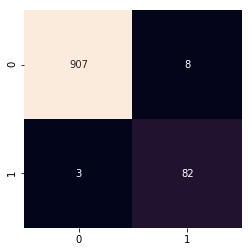

In [26]:
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix.T,square=True,annot=True,fmt='d',cbar=False)
  

## Parameter Tuning

In [27]:
## Use Grid Search for parameter tuning

from sklearn.model_selection import GridSearchCV

rfc_grid = RandomForestClassifier(n_jobs=-1,max_features='sqrt')
param_grid = {
    "n_estimators" : [9,18,27,36,45,54,63],
    "max_depth": [5,10],
    "min_samples_leaf" : [2,4]
    
}
 
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 10)

In [28]:
## Fit the grid search model
rfc_cv_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [9, 18, 27, 36, 45, 54, 63], 'max_depth': [5, 10], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

0.98575 {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 63}


In [30]:
rfc_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [31]:
rfc_model_63 = RandomForestClassifier(n_estimators=63,min_samples_leaf = 2, max_depth=10, n_jobs=-1,max_features='sqrt')
rfc_model_63

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=63, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
## Fit the model svc_c10_rbf on the train data (X_train,y_train)
rfc_model_63.fit(X = x_train,y = y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=63, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
y_pred_63 = rfc_model_63.predict(x_test)

In [34]:
## Print accuracy_score using y_test and y_pred
accuracy_score(y_test,y_pred_63)

0.986

In [35]:
## Print Confusion Matrix using y_test and y_pred
confusion_matrix(y_test,y_pred_63)

array([[907,   3],
       [ 11,  79]], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix


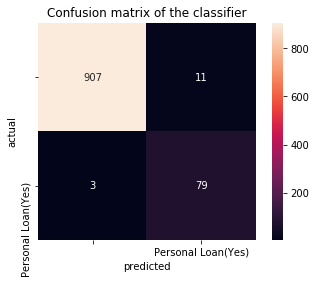

In [37]:

#sns.heatmap(matrix.T,square=True,annot=True,fmt='d',cbar=False)
labels = ["Personal Loan(Yes)", "Personal Loan(No)"]
matrix = confusion_matrix(y_test,y_pred_63)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = sns.heatmap(matrix.T,square=True,annot=True,fmt='d',cbar=True)
plt.title("Confusion matrix of the classifier")
#fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [38]:
feat_importance_63 = pd.Series(rfc_model_63.feature_importances_, index = x_train.columns)

In [39]:
# Sort importances
feat_importance_ordered_63 = feat_importance.nlargest(n=len(feat_importance))

NameError: name 'feat_importance' is not defined

In [ ]:
#plot importance
feat_importance_ordered_63.plot(kind='pie')

In [ ]:
# DEALING WITH DATA IMBALANCE

In [ ]:
y_train.value_counts()

In [ ]:
y_train.value_counts()/y_train.shape[0]

In [93]:
rfc_weights = RandomForestClassifier(n_estimators= 50, class_weight = {0:0.1,1:0.9})

In [94]:
rfc_weights.fit(X=x_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [96]:
y_pred_weights = rfc_weights.predict(x_test)

In [98]:
## Print accuracy_score using y_test and y_pred
accuracy_score(y_test,y_pred_weights)

0.98

In [99]:
## Print Confusion Matrix using y_test and y_pred
confusion_matrix(y_test,y_pred_weights)

array([[905,   5],
       [ 15,  75]], dtype=int64)

In [ ]:
# Feature Importance

In [105]:
feat_importance = pd.Series(rfc_weights.feature_importances_, index = x_train.columns)

In [106]:
# Sort importances
feat_importance_ordered = feat_importance.nlargest(n=len(feat_importance))

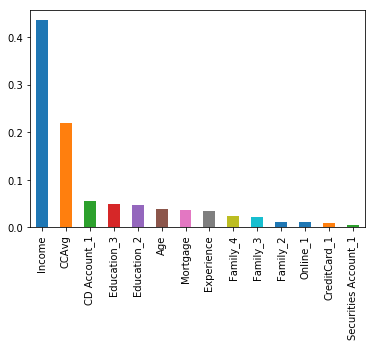

In [107]:
#plot importance
feat_importance_ordered.plot(kind='bar')